### 1.1 Clasificacion

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
data_xor = pd.DataFrame(data={
  'A': [-1,1,-1,1],
  'B': [-1,-1,1,1],
  'XOR': [0,1,1,0],
})

data_xor

,A,B,XOR
0,-1,-1,0
1,1,-1,1
2,-1,1,1
3,1,1,0


In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [4]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=data_xor[['A','B']], y=data_xor['XOR'], batch_size = 4, epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.8744 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.8719 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.8694 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.8669 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.8645 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.8621 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.8597 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.8573 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.8549 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.8526 - accuracy: 0.5000
Epoch 11/2000
1/1

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [6]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=data_xor[['A','B']], y=data_xor['XOR'], batch_size = 4, epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 0s 491ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 11/200

Usando la funcion de activacion sigmoide llegamos en menos epochs a 1 de accuracy

### 1.2 Regresion

In [7]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [8]:
x = np.linspace(0, 2*np.pi, 20)
y = np.linspace(0, 2*np.pi, 20)
z = np.linspace(0, 1, 20)

values = np.array(np.meshgrid(x,y,z)).T.reshape(-1,3)
values

array([[0.        , 0.        , 0.        ],
       [0.        , 0.33069396, 0.        ],
       [0.        , 0.66138793, 0.        ],
       ...,
       [6.28318531, 5.62179738, 1.        ],
       [6.28318531, 5.95249134, 1.        ],
       [6.28318531, 6.28318531, 1.        ]])

In [9]:
def f(x,y,z):
  return np.sin(x) + np.cos(y) + z

In [10]:
result = f(values[:,0], values[:,1], values[:,2])
result

array([1.        , 0.94581724, 0.78914051, ..., 1.78914051, 1.94581724,
       2.        ])

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=3, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01),loss=tf.keras.losses.MeanSquaredError())
hist = model.fit(x=values, y=result, batch_size = 32, epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6865
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4810
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4033
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3471
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3031
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.2700
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 0.2422
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 0.2264
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 0.2093
Epoch 10/200
250/250 [==============================] - 1s 2ms/step - loss: 0.2023
Epoch 11/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1956
Epoch 12/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1816
Epoch 13/200


1/1 [==============================] - 0s 69ms/step


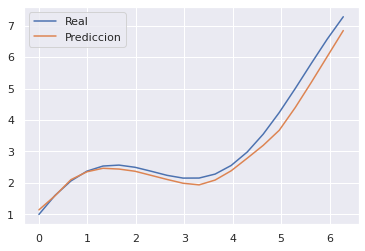

In [13]:
f_evaluada_en_x_real = f(x,x,x)
f_evaluada_en_x_pred = model.predict(np.c_[x,x,x])


plt.plot(x, f_evaluada_en_x_real, label="Real")
plt.plot(x, f_evaluada_en_x_pred, label="Prediccion")
plt.legend(loc="upper left")

plt.show()

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=3, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),loss=tf.keras.losses.MeanSquaredError())
hist = model.fit(x=values, y=result, batch_size = 32, epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 1.5470
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4913
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2637
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2419
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2326
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2100
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1843
Epoch 11/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1724
Epoch 12/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1595
Epoch 13/200


1/1 [==============================] - 0s 41ms/step


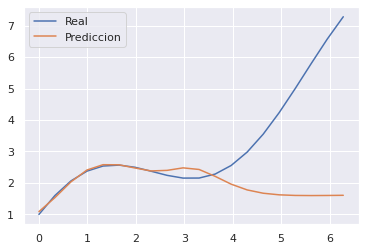

In [16]:
f_evaluada_en_x_real = f(x,x,x)
f_evaluada_en_x_pred = model.predict(np.c_[x,x,x])


plt.plot(x, f_evaluada_en_x_real, label="Real")
plt.plot(x, f_evaluada_en_x_pred, label="Prediccion")
plt.legend(loc="upper left")

plt.show()

La activacion por relu pareceria ser mucho mejor para este tipo de problema